# Coût du travail et revenu disponible

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from openfisca_matplotlib import graphs
from __future__ import division

In [2]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

In [3]:
year = 2010
period = "{}-01".format(year)
salaire_minimal = 1500
salaire_max = 8000

In [4]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 100,
            min = salaire_minimal,
            max = salaire_max,
            name = 'salaire_de_base',
            ),
        ],
    period = period,
    parent1 = dict(
        birth = date(1980, 1, 1),
        type_sal = 1,
        taille_entreprise = 2,
        exposition_accident = 2,
        allegement_fillon_mode_recouvrement =1,
        ),
    ).new_simulation(debug = True)


## Salaires superbut, brut, net et revenu disponible

In [5]:
salaire_superbrut = simulation.calculate('salsuperbrut', period = period)
salaire_brut = simulation.calculate('salaire_de_base', period = period)
salaire_net = simulation.calculate('salnet', period = period)
salaire_imposable = simulation.calculate('sal', period = period)
salaire_disponible = simulation.calculate('revdisp', period = period)

AssertionError: Requested period 2010-01 differs from 2010 returned by variable revdisp

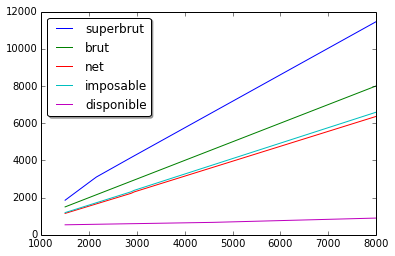

In [192]:
fig = plt.figure()
plt.plot(salaire_brut, salaire_superbrut, label = "superbrut")
plt.plot(salaire_brut, salaire_brut, label = "brut")
plt.plot(salaire_brut, salaire_net, label = "net")
plt.plot(salaire_brut, salaire_imposable, label = "imposable")
plt.plot(salaire_brut, salaire_disponible, label = "disponible")
plt.legend(loc = 0, shadow=True, fancybox=True)

In [193]:
taux_employe = 1 - salaire_net / salaire_brut  
taux_employeur = salaire_superbrut / salaire_brut - 1 

In [194]:
print (salaire_superbrut[:5] /salaire_brut[:5]) - 1
print salaire_superbrut[-5:]
print salaire_brut[-5:]
taux_employeur

[ 0.23950005  0.26770687  0.293607    0.31749547  0.33960187]
[ 11080.41210938  11174.02832031  11267.63378906  11361.25976562  11454.875     ]
[ 7737.37353516  7803.03027344  7868.68701172  7934.34326172  8000.        ]


array([ 0.23950005,  0.26770687,  0.293607  ,  0.31749547,  0.33960187,
        0.36009681,  0.37920249,  0.39700806,  0.41360819,  0.42929387,
        0.44249904,  0.44249952,  0.44249988,  0.44249594,  0.44250464,
        0.44249284,  0.44250107,  0.44250143,  0.44250178,  0.4425019 ,
        0.44250226,  0.44250238,  0.44216251,  0.44180977,  0.44147193,
        0.44113886,  0.44082558,  0.44052494,  0.44023311,  0.43996429,
        0.43969393,  0.43943381,  0.4391886 ,  0.43895221,  0.4387269 ,
        0.43850148,  0.43828619,  0.43807828,  0.43787456,  0.4376775 ,
        0.43749869,  0.43731368,  0.437132  ,  0.43696046,  0.43679857,
        0.43663478,  0.43648016,  0.43632567,  0.43617535,  0.43603778,
        0.43589365,  0.43576562,  0.43562889,  0.43549788,  0.43537617,
        0.43524969,  0.43513608,  0.4350177 ,  0.43490052,  0.43478966,
        0.43468702,  0.43457973,  0.43447673,  0.43437433,  0.43427598,
        0.43417978,  0.43408763,  0.43399918,  0.43390942,  0.43

(0, 0.5)

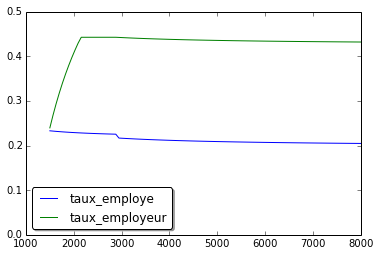

In [195]:
fig = plt.figure()
plt.plot(salaire_brut, taux_employe, label = "taux_employe")
plt.plot(salaire_brut, taux_employeur, label = "taux_employeur")
plt.legend(loc = 0, shadow=True, fancybox=True)
plt.ylim([0,.5])

In [196]:
- simulation.calculate('cotisations_patronales', period = period) / simulation.calculate('salaire_de_base', period = period)

array([ 0.4425    ,  0.44250688,  0.44250712,  0.44249552,  0.44250184,
        0.44249672,  0.44250256,  0.44250801,  0.44250813,  0.44249389,
        0.4424991 ,  0.44249955,  0.44249988,  0.44249597,  0.44250464,
        0.44249281,  0.4425011 ,  0.44250143,  0.44250172,  0.44250193,
        0.44250223,  0.44250244,  0.44216245,  0.44180968,  0.44147199,
        0.44113886,  0.44082552,  0.44052491,  0.44023302,  0.43996418,
        0.4396939 ,  0.43943375,  0.43918866,  0.43895227,  0.4387269 ,
        0.43850148,  0.43828622,  0.43807822,  0.43787456,  0.43767747,
        0.43749872,  0.43731365,  0.437132  ,  0.43696046,  0.43679863,
        0.43663481,  0.43648016,  0.43632564,  0.43617541,  0.43603784,
        0.43589371,  0.43576571,  0.43562898,  0.43549788,  0.43537611,
        0.43524966,  0.43513608,  0.4350177 ,  0.43490043,  0.43478963,
        0.43468708,  0.43457979,  0.43447667,  0.4343743 ,  0.43427595,
        0.43417987,  0.43408769,  0.43399927,  0.43390942,  0.43

In [199]:
- simulation.calculate('cotisations_patronales', period = period) / simulation.calculate('salaire_de_base', period = period)

array([ 0.4425    ,  0.44250688,  0.44250712,  0.44249552,  0.44250184,
        0.44249672,  0.44250256,  0.44250801,  0.44250813,  0.44249389,
        0.4424991 ,  0.44249955,  0.44249988,  0.44249597,  0.44250464,
        0.44249281,  0.4425011 ,  0.44250143,  0.44250172,  0.44250193,
        0.44250223,  0.44250244,  0.44216245,  0.44180968,  0.44147199,
        0.44113886,  0.44082552,  0.44052491,  0.44023302,  0.43996418,
        0.4396939 ,  0.43943375,  0.43918866,  0.43895227,  0.4387269 ,
        0.43850148,  0.43828622,  0.43807822,  0.43787456,  0.43767747,
        0.43749872,  0.43731365,  0.437132  ,  0.43696046,  0.43679863,
        0.43663481,  0.43648016,  0.43632564,  0.43617541,  0.43603784,
        0.43589371,  0.43576571,  0.43562898,  0.43549788,  0.43537611,
        0.43524966,  0.43513608,  0.4350177 ,  0.43490043,  0.43478963,
        0.43468708,  0.43457979,  0.43447667,  0.4343743 ,  0.43427595,
        0.43417987,  0.43408769,  0.43399927,  0.43390942,  0.43